In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
def scaler_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test, y_train, y_test

In [21]:
# Applying KernelPCA
def kpca(x_train, x_test, n):
    kpca = KernelPCA(n_components = n, kernel = 'rbf')
    x_train_kpca = kpca.fit_transform(x_train)
    x_test_kpca = kpca.transform(x_test)
    return x_train_kpca, x_test_kpca

In [22]:
def get_r_score(regressor, x_test_pca, y_test):
    y_pred = regressor.predict(x_test_pca)
    r_score = r2_score(y_test, y_pred)
    return r_score

In [23]:
def linear(x_train_kpca, y_train, x_test_kpca, y_test):
    regressor = LinearRegression()
    regressor.fit(x_train_kpca, y_train)
    r_score = get_r_score(regressor, x_test_kpca, y_test)
    return regressor, r_score, x_test_kpca, y_test

In [24]:
def svml(x_train_kpca, y_train, x_test_kpca, y_test):
    regressor = SVR(kernel = 'linear')
    regressor.fit(x_train_kpca, y_train)
    r_score = get_r_score(regressor, x_test_kpca, y_test)
    return regressor, r_score, x_test_kpca, y_test

In [25]:
def svmnl(x_train_kpca, y_train, x_test_kpca, y_test):
    regressor = SVR(kernel = 'rbf')
    regressor.fit(x_train_kpca, y_train)
    r_score = get_r_score(regressor, x_test_kpca, y_test)
    return regressor, r_score, x_test_kpca, y_test

In [26]:
def decision(x_train_kpca, y_train, x_test_kpca, y_test):
    regressor = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0)
    regressor.fit(x_train_kpca, y_train)
    r_score = get_r_score(regressor, x_test_kpca, y_test)
    return regressor, r_score, x_test_kpca, y_test

In [27]:
def random(x_train_kpca, y_train, x_test_kpca, y_test):
    regressor = RandomForestRegressor(random_state = 0)
    regressor.fit(x_train_kpca, y_train)
    r_score = get_r_score(regressor, x_test_kpca, y_test)
    return regressor, r_score, x_test_kpca, y_test

In [28]:
def pca_regression(acclin, accsvml, accsvmnl, accdeci, accrand):
    dataframe = pd.DataFrame( index = ['KernelPCA'], columns = ['Linear', 'SVML', 'SVMNL', 'Decision', 'Random'])
    for number, item in enumerate(dataframe.index):
        dataframe['Linear'][item] = acclin[number]
        dataframe['SVML'][item] = accsvml[number]
        dataframe['SVMNL'][item] = accsvmnl[number]
        dataframe['Decision'][item] = accdeci[number]
        dataframe['Random'][item] = accrand[number]
    return dataframe        

In [29]:
dataset = pd.read_csv('prep.csv', index_col = None)  
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


In [30]:
df1 = dataset
df1 = pd.get_dummies(df1, dtype = int, drop_first = True)

In [31]:
df1

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,0,0,0,0,0,0,1,1,0,1
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,1,0,0,0,0,0,1,0,0,1
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,1,0,0,0,0,0,1,0,0,1
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,1,0,0,0,0,0,1,0,1,1
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,1,0,0,0,0,0,1,0,0,1
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,1,0,0,1,1,0,1,0,1,1
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,1,0,0,1,1,0,0,0,0,1
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,1,0,0,1,1,0,1,0,1,1


In [32]:
x = df1.iloc[:,0:28].values
y = df1.iloc[:,27].values

In [33]:
x.shape

(399, 28)

In [34]:
x_train, x_test, y_train, y_test = scaler_split(x, y)

In [35]:
acclin = []
accsvml = []
accsvmnl = []
accknn = []
accnaive = []
accdeci = []
accrand = []
n_components_list = []

In [36]:
for n in range(1, 4):  # for Kernelpca with 1 to 3 components
    x_train_kpca, x_test_kpca = kpca(x_train, x_test, n)
 
    regressor, r_score, x_test_kpca, y_test = linear(x_train_kpca, y_train, x_test_kpca, y_test)
    acclin.append(r_score)
    
    regressor, r_score, x_test_kpca, y_test = svml(x_train_kpca, y_train, x_test_kpca, y_test)
    accsvml.append(r_score)
    
    regressor, r_score, x_test_kpca, y_test = svmnl(x_train_kpca, y_train, x_test_kpca, y_test)
    accsvmnl.append(r_score)
    
    regressor, r_score, x_test_kpca, y_test = decision(x_train_kpca, y_train, x_test_kpca, y_test)
    accdeci.append(r_score)
    
    regressor, r_score, x_test_kpca, y_test = random(x_train_kpca, y_train, x_test_kpca, y_test)
    accrand.append(r_score)
    
    n_components_list.append(n)
  

In [37]:
results_df = pd.DataFrame({
    'KernelPCA': n_components_list,
    'Linear': acclin,
    'SVML': accsvml,
    'SVMNL': accsvmnl,
    'Decision': accdeci,
    'Random': accrand
})


results_df.set_index('KernelPCA', inplace=True)

# Print the final result table
print(results_df)

             Linear      SVML     SVMNL  Decision    Random
KernelPCA                                                  
1          0.897974  0.896864  0.973615       1.0  0.999740
2          0.922505  0.920917  0.982770       1.0  0.999940
3          0.922642  0.921500  0.982973       1.0  0.999552


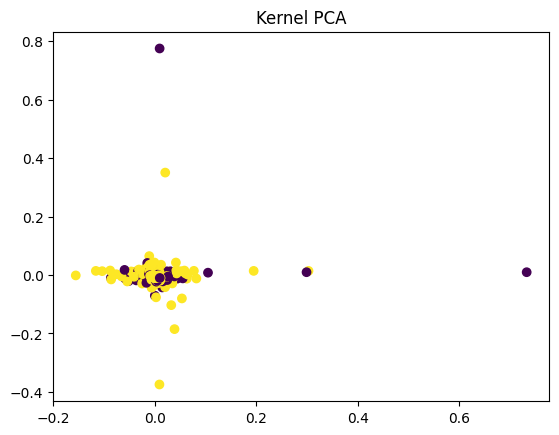

In [42]:
kpca = KernelPCA(kernel = 'rbf', gamma = 15)
x_kpca = kpca.fit_transform(x)
plt.title('Kernel PCA')
plt.scatter(x_kpca[:,0], x_kpca[:,1], c= y)
plt.show()